# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Seyram | Atsu Quist | SeyramAtsuQuist,15-10-24 | 5 | 25% |
| Member 2: | Akosua | Gyimah | AkosuaGyimah,07-10-24 | 5 | 25% |
| Member 3: | Gideon | Asamoah | Signature | Hours | 25% |
| Member 4: | Joseph | Mills | josephmills,15-10-24 | 4  | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

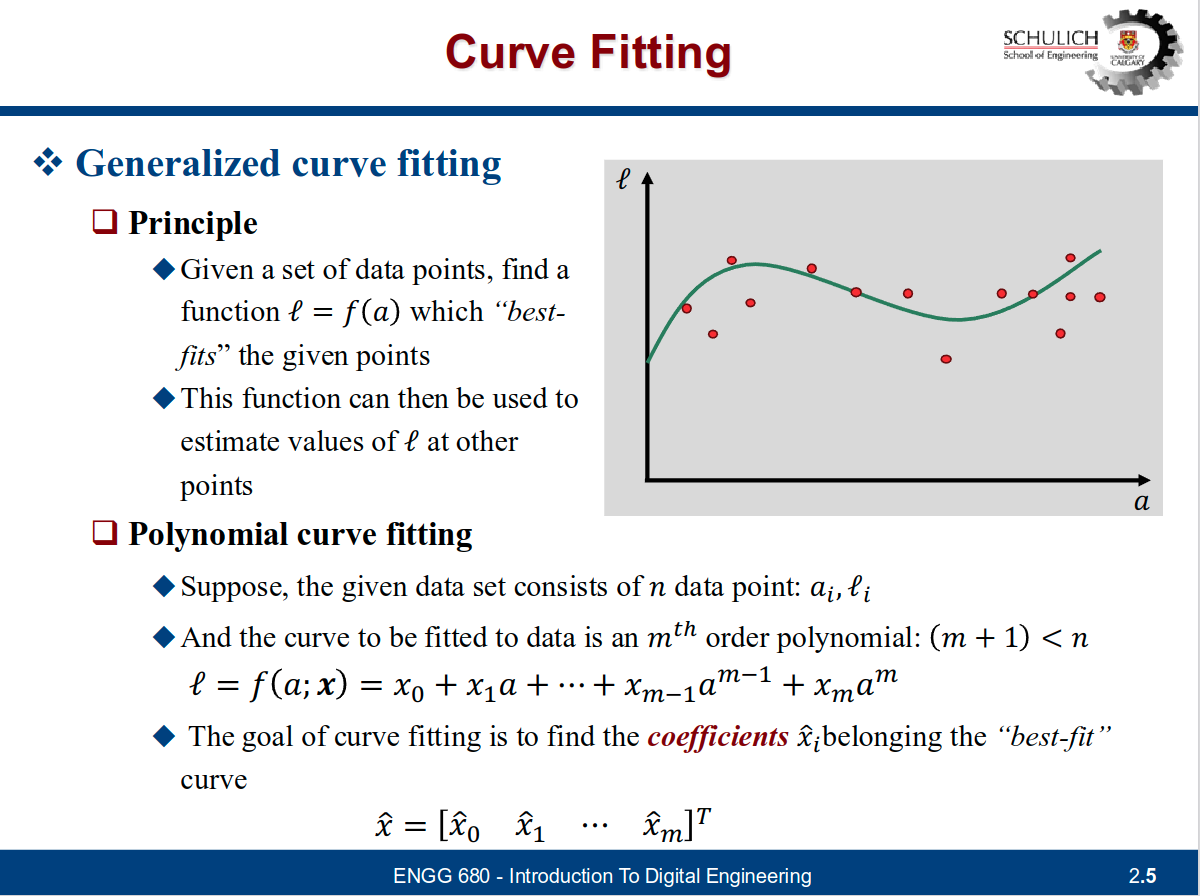

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [2]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()

print(f"The arr_data is: {arr_data}")#This code was to visualize the array(not in origanl content)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()
l_var = df_data['l_var'].to_numpy()
l_true = df_data['l_true'].to_numpy()

print(f"The noisy observations are:{l}") #This code was to visualize the array(not in origanl content)
print(f"The variance of observations are:{l_var}")#This code was to visualize the array(not in origanl content)
print(f"The true observations are:{l_true}")#This code was to visualize the array(not in origanl content)

The arr_data is: [[-16.19488895  36.         -17.        ]
 [-15.93614373 144.         -17.28959808]
 [-38.69059397 169.         -17.57915025]
 ...
 [-22.99118629  25.         -16.42084975]
 [ -8.01284044  64.         -16.71040192]
 [-16.63632193   4.         -17.        ]]
The noisy observations are:[-16.19488895 -15.93614373 -38.69059397 -15.76829142 -19.35466885
 -15.16497902 -15.49640085 -16.91724904 -17.52349248 -32.95407757
 -16.00065694 -25.04422086 -14.89213806 -15.7987726  -26.75754246
 -12.65445009 -23.50784906 -29.31586174 -19.82059135 -35.53546202
 -22.95534213 -27.76451016 -24.29809087 -20.97183964 -25.62832789
 -25.46742842 -30.93685254  -4.45364159 -22.54372279 -22.57232947
 -19.33225187 -28.72219969 -19.1445899  -22.82256126 -42.15746678
 -38.23550958 -27.6447096  -43.1840432  -28.78127217 -30.88732948
 -28.19835461 -22.70655014 -28.99935895 -29.76235334 -25.21827045
 -30.73885495 -20.311819   -25.37382489 -29.68141665 -29.53575172
  -1.95803693 -24.17929591  -6.8115061

In [4]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
print(n)       #This code was to visualize the array(not in origanl content)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)
print(P)      #This code was to visualize the array(not in origanl content)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


500
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


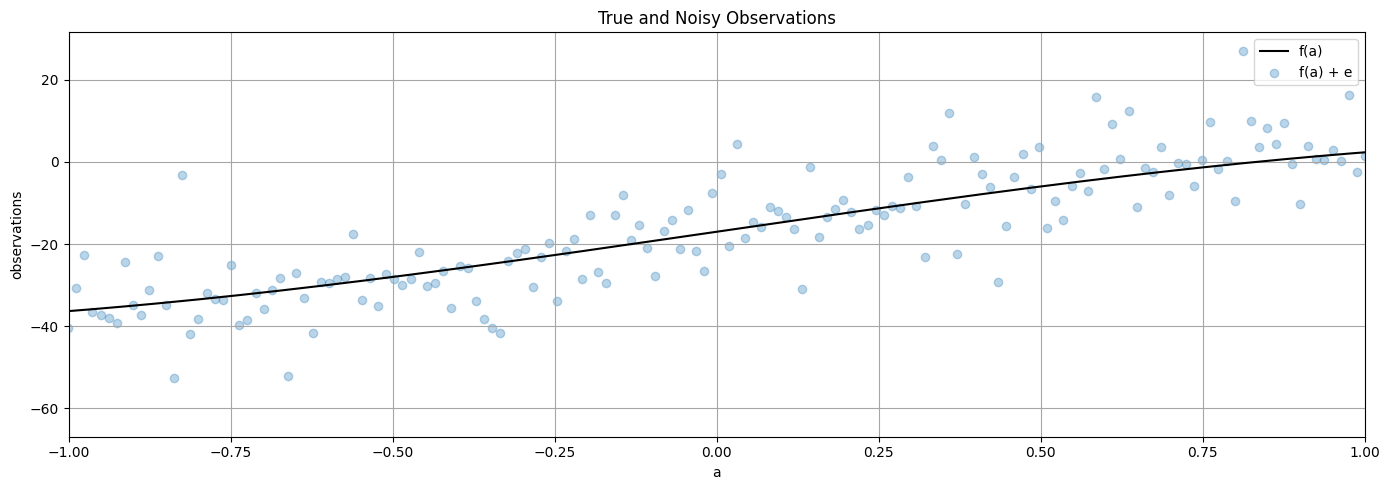

In [5]:
from sys import set_asyncgen_hooks
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plotting the true observations as a line
ax.plot(a, l_true, label='f(a)', color='k')

# Plotting the noisy observations as a scatter plot
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

# Adding Labels, Title and legend
ax.set_xlabel('a')
ax.set_ylabel('observations')
ax.set_title('True and Noisy Observations')
ax.legend()

# limiting the x-ayis scale from -1 to 1
ax.set_xlim(-1, 1)

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

 # Display the plot
plt.show()

In [6]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

     # Step i: Creating the design matrix A
    A = np.vander(a, deg + 1, increasing=True)

    # Step ii: Computing A^T P A and A^T P l
    A_T = A.T
    ATPA = A_T @ P @ A
    ATPl = A_T @ P @ l

    # Step iii: Solving for the polynomial coefficients x
    x = np.linalg.inv(ATPA) @ ATPl

    # Step iv: Computing the covariance matrix of the estimated coefficients
    cov_x = np.linalg.inv(ATPA)

    # Step v: Computing the fitted values (y_hat)
    y_hat = A @ x

    # Step vi: Computing the residuals v (differences between noisy and fitted values)
    v = l - y_hat

    # Step vii: Computing the a posteriori variance factor (apv)
    # Degrees of freedom = number of observations (n) - number of estimated parameters (deg + 1)
    dof = len(l) - (deg + 1)
    apv = (v.T @ P @ v) / dof


    return (x, cov_x, apv, v)

In [7]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Polynomial degrees to test
degrees = [1, 3, 5]

# Looping over the degrees and fitting the polynomial curve
for deg in degrees:
    print(f"Fitting polynomial of degree {deg}")

    # Calling the fit_polynomial_curve function
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    # Printing results for each degree
    print(f"Estimated coefficients (degree {deg}): {x}")
    print(f"Covariance matrix (degree {deg}): \n{cov_x}")
    print(f"A posteriori variance factor (degree {deg}): {apv}")
    print(f"Residuals (degree {deg}): {v}")
    print("-" * 50)  # Separator between results



Fitting polynomial of degree 1
Estimated coefficients (degree 1): [-16.59352348   7.25633807]
Covariance matrix (degree 1): 
[[2.00000000e-03 2.06512225e-19]
 [2.06512225e-19 6.05500247e-04]]
A posteriori variance factor (degree 1): 162.742608604322
Residuals (degree 1): [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e

In [8]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Fit the polynomial curve for degree 1 (linear), 3 (cubic), and 5 (quintic)
x1, _, _, _ = fit_polynomial_curve(a, l, P, 1)  # Degree 1
x3, _, _, _ = fit_polynomial_curve(a, l, P, 3)  # Degree 3
x5, _, _, _ = fit_polynomial_curve(a, l, P, 5)  # Degree 5


line_uw = np.polyval(x1, a)
cubic_uw = np.polyval(x3, a)
quintic_uw = np.polyval(x5, a)

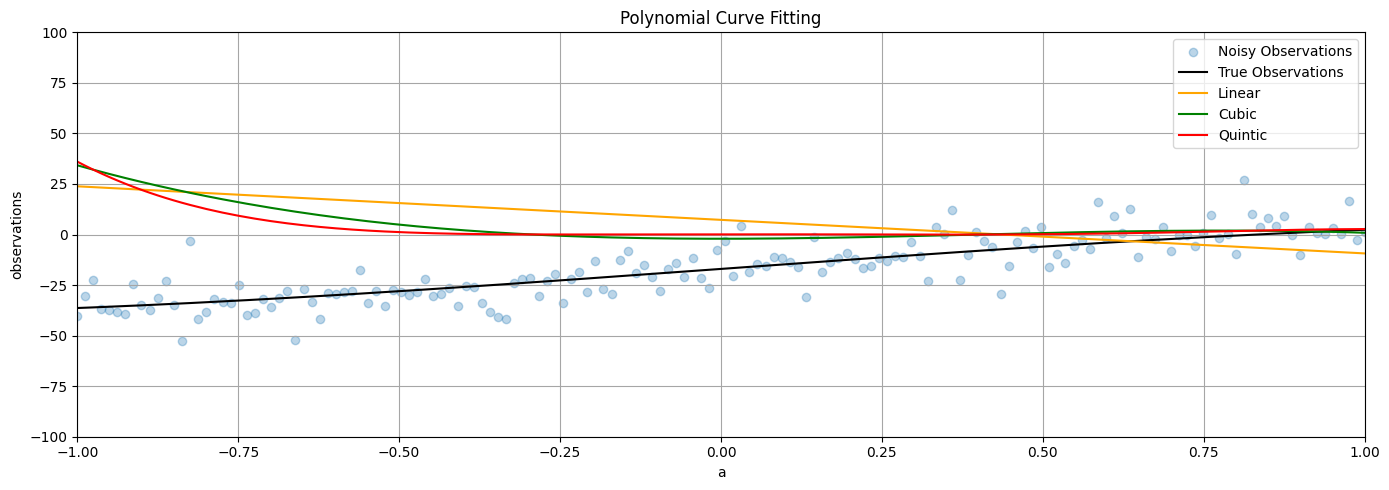

In [9]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plotting the polynomial functions, noisy observations, and true observations
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot of noisy observations (l) on the axis
ax.scatter(a, l, color='tab:blue', alpha=0.3, label='Noisy Observations', marker='o')

# Plot true observations (l_true) on the same axis
ax.plot(a, l_true, color='k', label='True Observations')

# Plot the polynomial functions
ax.plot(a, line_uw, label='Linear', color='orange')
ax.plot(a, cubic_uw, label='Cubic', color='green')
ax.plot(a, quintic_uw, label='Quintic', color='red')

# Adding Labels, Title and legend
ax.set_xlabel('a')
ax.set_ylabel('observations')
ax.set_title('Polynomial Curve Fitting')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

#limiting x Scale from -1 to 1
ax.set_xlim(-1, 1)

#limiting y Scale from -100 to 100
ax.set_ylim(-100, 100)

fig.tight_layout()

In [13]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# Fit polynomial for degree 1 (linear), 3 (cubic), and 5 (quintic)
x1, cov_x1, apv1, v1 = fit_polynomial_curve(a, l, P, 1)  # Degree 1
x3, cov_x3, apv3, v3 = fit_polynomial_curve(a, l, P, 3)  # Degree 3
x5, cov_x5, apv5, v5 = fit_polynomial_curve(a, l, P, 5)  # Degree 5

# Print the a posteriori variance factor (apv) for each polynomial degree
print(f"A posteriori variance factor (degree 1 - Linear): {apv1}")
print(f"A posteriori variance factor (degree 3 - Cubic): {apv3}")
print(f"A posteriori variance factor (degree 5 - Quintic): {apv5}")


A posteriori variance factor (degree 1 - Linear): 162.742608604322
A posteriori variance factor (degree 3 - Cubic): 66.13227783131883
A posteriori variance factor (degree 5 - Quintic): 63.758344630184176


In [17]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

# Computing the predicted observations for each polynomial
predicted_linear = line_uw  # Linear predictions
predicted_cubic = cubic_uw   # Cubic predictions
predicted_quintic = quintic_uw  # Quintic predictions

# Computing the L2 norm between predicted observations and true observations
L2_norm_linear = np.linalg.norm(predicted_linear - l_true)
L2_norm_cubic = np.linalg.norm(predicted_cubic - l_true)
L2_norm_quintic = np.linalg.norm(predicted_quintic - l_true)

# Printing the results
print(f"L2-Norm between predicted observations and true observations (degree 1 - Linear): {L2_norm_linear}")
print(f"L2-Norm between predicted observations and true observations (degree 3 - Cubic): {L2_norm_cubic}")
print(f"L2-Norm between predicted observations and true observations (degree 5 - Quintic): {L2_norm_quintic}")



L2-Norm between predicted observations and true observations (degree 1 - Linear): 1123.295556947932
L2-Norm between predicted observations and true observations (degree 3 - Cubic): 5090.2145215010905
L2-Norm between predicted observations and true observations (degree 5 - Quintic): 38448.85319008694


In [18]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

print("The a posteriori variance factor decreases significantly as the polynomial degree increases from 1 to 3, and then shows a slight decrease from degree 3 to degree 5.")
print("The norm values show an unexpected increase from degree 1 to degree 3 and a dramatic rise to degree 5.")



The a posteriori variance factor decreases significantly as the polynomial degree increases from 1 to 3, and then shows a slight decrease from degree 3 to degree 5.
The norm values show an unexpected increase from degree 1 to degree 3 and a dramatic rise to degree 5.


In [19]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(l_var)
print(P)

[[ 36   0   0 ...   0   0   0]
 [  0 144   0 ...   0   0   0]
 [  0   0 169 ...   0   0   0]
 ...
 [  0   0   0 ...  25   0   0]
 [  0   0   0 ...   0  64   0]
 [  0   0   0 ...   0   0   4]]


A Posteriori Variance Factor (degree 1): 14431.266355603284
A Posteriori Variance Factor (degree 3): 7803.4118774491135
A Posteriori Variance Factor (degree 5): 7554.463211391499
L2-Norm between predicted observations and true observations (degree 1 - Linear): 1124.9189036129637
L2-Norm between predicted observations and true observations (degree 3 - Cubic): 4965.844914563897
L2-Norm between predicted observations and true observations (degree 5 - Quintic): 36921.58557091159


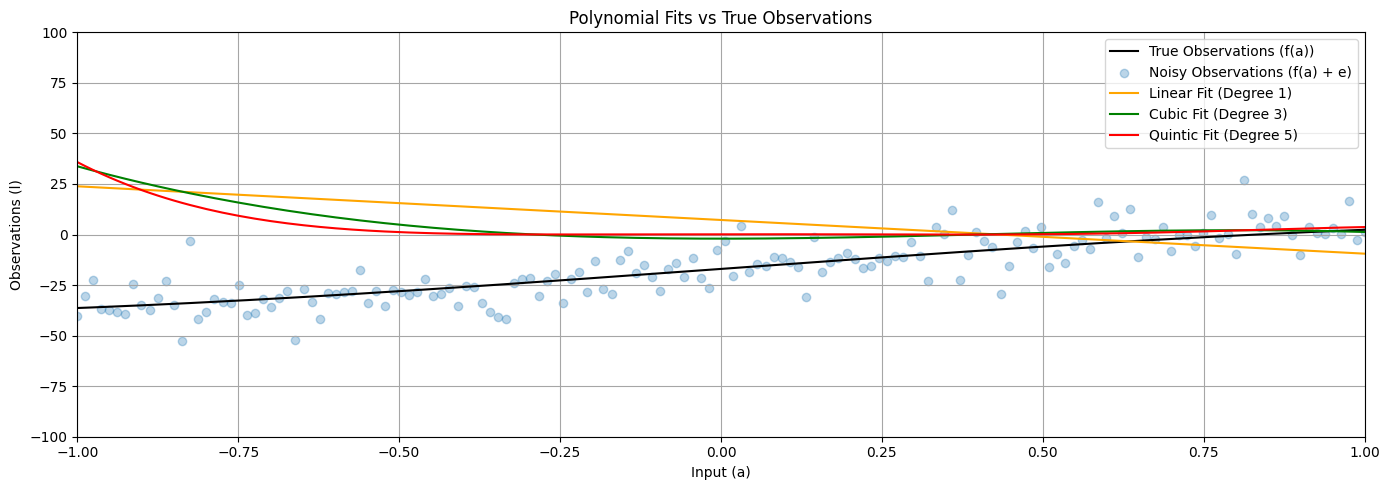

In [23]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# step_6: call the fit polynomial curve function and fetch the results
deg_list=[1,3,5]
results = {}

for deg in deg_list:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {'coefficients': x, 'covariance': cov_x, 'apv': apv, 'residuals': v}

# Step 7: Construct polynomial functions for each degree
line_uw = np.polyval(results[1]['coefficients'], a)  # Linear predictions
cubic_uw = np.polyval(results[3]['coefficients'], a)  # Cubic predictions
quintic_uw = np.polyval(results[5]['coefficients'], a)  # Quintic predictions

# Step 8: Plot each polynomial function, noisy observations l, true observations l_true

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plotting true observations
ax.plot(a, l_true, color='k', label='True Observations (f(a))')

# Plotting noisy observations
ax.scatter(a, l, color='tab:blue', label='Noisy Observations (f(a) + e)', alpha=0.3, marker='o')

# Plotting polynomial fits
ax.plot(a, line_uw, color='orange', label='Linear Fit (Degree 1)')
ax.plot(a, cubic_uw, color='green', label='Cubic Fit (Degree 3)')
ax.plot(a, quintic_uw, color='red', label='Quintic Fit (Degree 5)')

# Setting up the plot
ax.set_xlim(-1, 1)
ax.set_ylim(-100, 100)
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations (l)')
ax.set_title('Polynomial Fits vs True Observations')
ax.legend()
ax.grid(True, which='both', ls='-', color='0.65')

# Final adjustments
fig.tight_layout()

# Step 9: Print the a posteriori variance factor for each polynomial function
for deg in deg_list:
    print(f"A Posteriori Variance Factor (degree {deg}): {results[deg]['apv']}")

# stecurve(a, l, P, deg)
    results[deg] = {'coefficients': x, 'covariance': cov_x, 'apv': apv, 'residuals': v}

# Step 10: Compute and print the L2-norm between the predicted observations and true observations
L2_norm_linear = np.linalg.norm(line_uw - l_true)
L2_norm_cubic = np.linalg.norm(cubic_uw - l_true)
L2_norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the results
print(f"L2-Norm between predicted observations and true observations (degree 1 - Linear): {L2_norm_linear}")
print(f"L2-Norm between predicted observations and true observations (degree 3 - Cubic): {L2_norm_cubic}")
print(f"L2-Norm between predicted observations and true observations (degree 5 - Quintic): {L2_norm_quintic}")


In [24]:
# step 14
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
print("The phenomena observed relates to overfitting and underfitting. The weighted LSE method mitigates overfitting by reducing the impact of less reliable (high variance) observations, allowing the model to generalize better\nThe unweighted approach tends to treat all observations as equally informative, potentially leading to overfitting, especially with higher-degree polynomials, where the model may capture the noise rather than the signal.")

The phenomena observed relates to overfitting and underfitting. The weighted LSE method mitigates overfitting by reducing the impact of less reliable (high variance) observations, allowing the model to generalize better
The unweighted approach tends to treat all observations as equally informative, potentially leading to overfitting, especially with higher-degree polynomials, where the model may capture the noise rather than the signal.


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

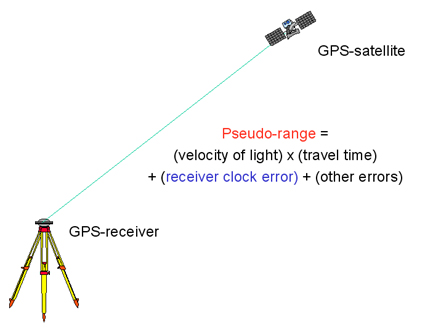

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [25]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [26]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [27]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [28]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [29]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [30]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
